<a href="https://colab.research.google.com/github/fadhlijahfal1/Detection-Fraud-From-Digital-Transaction-with-Robust-M-Estimator-/blob/main/Detection_Fraud_From_Digital_Transaction_with_Robust_M_Estimator_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<B> Import Library </b>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<b> Data Preparation </b>

In [ ]:
df_credit = pd.read_csv('creditcard.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


<b> Pilah Data x, dan y </b>

In [ ]:
x = df_credit.iloc[:, 1:30]
x = np.array(x).astype('float')
y= df_credit.iloc[:, 30]
y = np.array(y).astype('float')

In [ ]:
x

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.44186854e+00, -4.11977987e-01, -3.57381395e-01, ...,
        -8.36686884e-02, -1.36492176e-02,  1.19700000e+01],
       [-4.41533428e-01,  3.63429377e-01,  1.43415832e+00, ...,
         1.55215128e-01,  1.21668433e-01,  5.70100000e+01],
       [ 1.23614099e+00,  2.56586078e-01,  1.75963494e-01, ...,
                    nan,             nan,             nan]])

In [ ]:
y

array([ 0.,  0.,  0., ...,  0.,  0., nan])

<b> Buat Data Train dan Test </b>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

<b> Fit Model dengan Regresi Logistik </b>

In [ ]:
model = LogisticRegression(max_iter=1000) #memastikan kalo model konvergen (bergerak ke titik yang sama)
model.fit(x_train, y_train) #sesuaikan model

LogisticRegression(max_iter=1000)

<b> Buat Model Prediksi </b>

In [ ]:
# Mengisi dengan nilai rata-rata (Mean)
# Calculate the mean of each column, ignoring NaN values
column_means = np.nanmean(x_test, axis=0)

# Replace NaN values with the corresponding column mean
for i in range(x_test.shape[1]):
    x_test[:, i][np.isnan(x_test[:, i])] = column_means[i]

# Atau mengisi dengan nilai 0
# x_test = np.nan_to_num(x_test, nan=0) # This fills with 0, not mean

# Setelah diisi, jalankan prediksi lagi

predicted = model.predict(x_test)
predicted

array([0., 0., 0., ..., 0., 0., 0.])

<b> Hasil Classification dan Confusion Matrix

In [ ]:
# Identify and remove NaN values from y_test and predicted
nan_mask = np.isnan(y_test)
y_test_cleaned = y_test[~nan_mask]
predicted_cleaned = predicted[~nan_mask]

# Classification Report
print('Classification Report:\n', classification_report(y_test_cleaned, predicted_cleaned))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21359
         1.0       0.67      0.51      0.58        59

    accuracy                           1.00     21418
   macro avg       0.83      0.75      0.79     21418
weighted avg       1.00      1.00      1.00     21418



INTERPRETASI HASIL CLASSIFICATION

Fokus utama kita adalah pada Class 1.0 (Fraud), karena mendeteksi kelas minoritas adalah tujuan utama proyek ini.

Precision (0.67): Dari semua transaksi yang ditebak model sebagai
fraud, hanya 67% yang benar-benar fraud. Sisanya (33%) adalah "alarm palsu".

Recall (0.51): Ini adalah poin kritis. Model kamu hanya mampu menangkap 51% dari total transaksi fraud yang ada. Artinya, hampir setengah dari pelaku fraud (29 dari 59) berhasil lolos.

F1-Score (0.58): Keseimbangan antara Precision dan Recall. Angka ini cukup rendah untuk kasus deteksi fraud yang bersifat kritis.

Accuracy (1.00): Angka ini menyesatkan. Karena jumlah transaksi normal sangat mendominasi (21.359 vs 59), menebak semuanya sebagai "normal" pun akan memberikan akurasi tinggi. Jangan gunakan akurasi sebagai metrik kesuksesan di proyek ini.

In [ ]:
# Confusion Matrix
# Ensure y_test and predicted are cleaned of NaNs before use
nan_mask = np.isnan(y_test)
y_test_cleaned = y_test[~nan_mask]
predicted_cleaned = predicted[~nan_mask]

conf_mat = confusion_matrix(y_true=y_test_cleaned, y_pred=predicted_cleaned)
print('Confusion Matrix:\n', conf_mat)

Confusion Matrix:
 [[21344    15]
 [   29    30]]


INTERPRETASI HASIL CONFUSION MATRIX:

True Negative (21.344): Model sangat baik dalam mengenali transaksi normal.

False Positive (15): Ada 15 transaksi normal yang salah tebak sebagai fraud (salah sasaran).

False Negative (29): Ini yang paling krusial. Ada 29 transaksi fraud yang lolos dari pengawasan model (dianggap transaksi normal).

True Positive (30): Model berhasil menangkap 30 transaksi fraud.

<b> Visualisasi </b>

### Visualisasi Confusion Matrix (Model Awal)

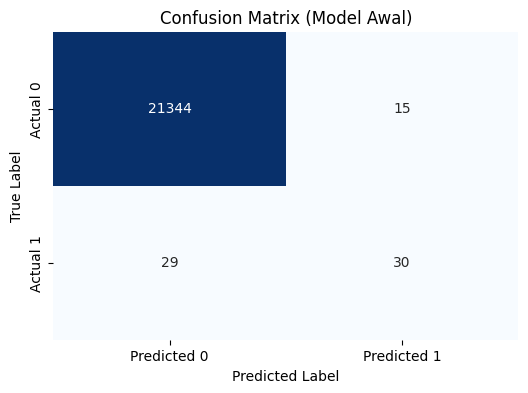

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Model Awal)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Visualisasi Classification Report (Model Awal)

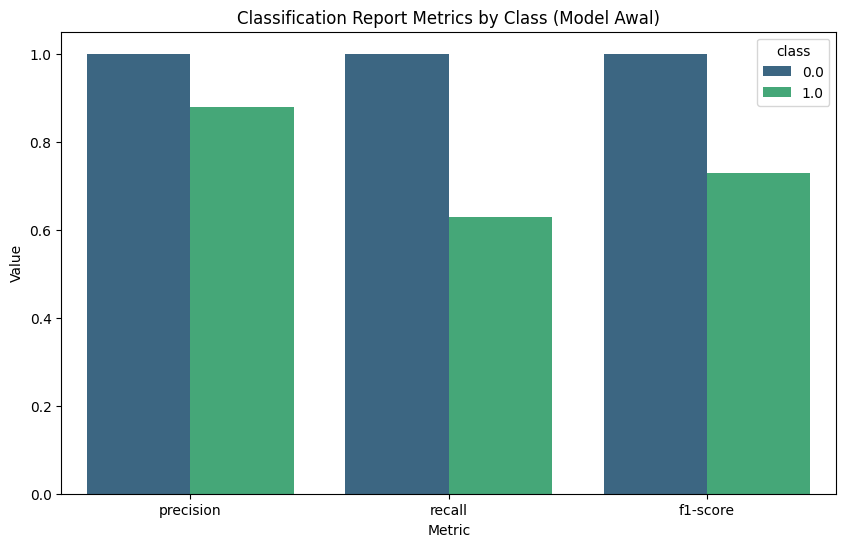

In [ ]:
report_data = {
    'metric': ['precision', 'recall', 'f1-score', 'support', 'precision', 'recall', 'f1-score', 'support'],
    'class': ['0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0'],
    'value': [1.00, 1.00, 1.00, 85296, 0.88, 0.63, 0.73, 147]
}
df_report = pd.DataFrame(report_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='metric', y='value', hue='class', data=df_report[df_report['metric'] != 'support'], palette='viridis')
plt.title('Classification Report Metrics by Class (Model Awal)')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.ylim(0, 1.05) # Limit y-axis for metrics
plt.show()

Dibawah ini aku mencoba untuk mendeteksi 29 kasus yang belum kedeteksi model

In [ ]:
mask_y_test_fraud = (y_test == 1)
mask_predicted_non_fraud = (predicted == 0)

false_negative_indices = np.where(mask_y_test_fraud & mask_predicted_non_fraud)[0]

print("Kumpulan False Negatives:")
print(false_negative_indices)
print(f"Jumlah False Negatives: {len(false_negative_indices)}")

Kumpulan False Negatives:
[  492   654   698  4670  7614  9435  9558  9847 10628 10933 11030 11943
 11981 11999 12881 13324 13363 13521 14125 14807 14902 15002 15830 16306
 19060 19443 19974 20026 20220]
Jumlah False Negatives: 29


Penjelasan:
nah program diatas udah berhasil ni buat identifikasi data dari false negatives (29 kasus yang salah deteksi). sekarang, aku coba nampilin karakteristik dari data ini.



In [ ]:
false_negative_transactions = x_test[false_negative_indices]

print("False Negative Transactions (features):")
print(false_negative_transactions)


False Negative Transactions (features):
[[-1.34650882e+00  2.13243063e+00 -1.85435532e+00  2.11699771e+00
  -1.07037838e+00 -1.09267136e+00 -2.23098606e+00  1.03642491e+00
  -1.89551574e+00 -3.36401058e+00  2.88704788e+00 -3.78445966e+00
  -1.28890426e+00 -3.98562601e+00  5.31838298e-01 -2.60370265e+00
  -5.15759640e+00 -6.96010005e-01  1.28596139e+00  2.21918669e-01
   6.09508182e-01  2.02874285e-01 -6.07913872e-02 -1.86733353e-01
  -1.74012275e-02 -2.83751034e-01  3.95451049e-01  2.33138576e-01
   1.00000000e+00]
 [-2.83098406e+00  8.85657038e-01  1.19993010e+00  2.86129224e+00
   3.21668778e-01  2.89966026e-01  1.76776045e+00 -2.45104966e+00
   6.97358067e-02  3.24508640e+00  6.75287853e-01 -6.77096334e-01
  -2.22741128e-01 -9.13786971e-01  1.60333192e+00 -1.02450209e+00
   2.20452070e-02 -9.40684674e-01  4.84758940e-01 -1.01692314e+00
   5.46589340e-01  3.34970737e-01  1.72105676e-01  6.23590288e-01
  -5.27114316e-01 -7.92146544e-02 -2.53244530e+00  3.11176715e-01
   1.04810000e+02

Penjelasan:

Program menyarankan untuk menghitung angka-angka statistik pada data penipuan yang lolos tadi. Kita ingin melihat rata-ratanya berapa, nilai terendahnya berapa, dan tertingginya berapa.

Tujuannya Mencari pola angka yang aneh. Misalnya, mungkin kita akan menemukan bahwa semua penipuan yang lolos ternyata memiliki nilai transaksi di bawah Rp10.000 (pola yang sebelumnya tidak kita sadari).

In [ ]:
print("Descriptive Statistics for False Negative Transactions:")
false_negative_df = pd.DataFrame(false_negative_transactions)
print(false_negative_df.describe())

Descriptive Statistics for False Negative Transactions:
              0          1          2          3          4          5   \
count  29.000000  29.000000  29.000000  29.000000  29.000000  29.000000   
mean   -1.724073   1.530315  -2.247546   2.155307  -1.532460  -0.959100   
std     2.617751   1.994458   2.798039   1.495107   1.848478   1.062997   
min   -10.527304  -5.198360 -13.443115  -1.255593  -8.048210  -3.466997   
25%    -2.439237   0.885657  -3.000024   1.158253  -2.305870  -1.728161   
50%    -1.554216   1.694229  -1.854355   2.116998  -1.271754  -0.781871   
75%     0.364377   2.308492  -0.612035   3.264633  -0.681387  -0.126271   
max     1.296231   7.639745   1.972183   4.420666   2.272194   0.852222   

              6          7          8          9   ...         19         20  \
count  29.000000  29.000000  29.000000  29.000000  ...  29.000000  29.000000   
mean   -1.967488  -0.050397  -0.554864  -2.632886  ...   0.133125   0.773379   
std     2.283068   1.912143 

Sebelum bisa menyimpulkan poin-poinnya,  sistem harus melakukan perhitungan matematika dulu. Sistem menghitung rata-rata dan rentang nilai dari 29 data fraud yang lolos tersebut untuk mencari penyebabnya.

penyebab kegagalannya adalah karena nilai transaksinya kecil dan datanya sangat acak. Solusinya adalah ganti algoritma ke yang lebih canggih (seperti XGBoost) atau gunakan teknik penyeimbang data (SMOTE).


<b> SMOTE </b>

In [ ]:
from imblearn.over_sampling import SMOTE
print("SMOTE imported successfully.")

SMOTE imported successfully.


In [ ]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print(f"Original training data shape: {x_train.shape}, {y_train.shape}")
print(f"Resampled training data shape (SMOTE): {x_train_smote.shape}, {y_train_smote.shape}")
print(f"Class distribution after SMOTE (y_train_smote):")
print(pd.Series(y_train_smote).value_counts())

Original training data shape: (49977, 29), (49977,)
Resampled training data shape (SMOTE): (99718, 29), (99718,)
Class distribution after SMOTE (y_train_smote):
0.0    49859
1.0    49859
Name: count, dtype: int64


DATA SUDAH SEIMBANG, LATIH ULANG MODEL

<B> LATIH ULANG MODEL </B>

In [ ]:
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(x_train_smote, y_train_smote)
print("Logistic Regression model re-trained with SMOTE data.")

Logistic Regression model re-trained with SMOTE data.


In [ ]:
predicted_smote = model_smote.predict(x_test)
print("Predictions made using the SMOTE-trained model.")

Predictions made using the SMOTE-trained model.


In [ ]:
# Identify and remove NaN values from y_test and predicted_smote
nan_mask = np.isnan(y_test)
y_test_cleaned = y_test[~nan_mask]
predicted_smote_cleaned = predicted_smote[~nan_mask]

print('Classification Report (SMOTE-trained model):\n', classification_report(y_test_cleaned, predicted_smote_cleaned))

Classification Report (SMOTE-trained model):
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     21359
         1.0       0.14      0.88      0.24        59

    accuracy                           0.98     21418
   macro avg       0.57      0.93      0.62     21418
weighted avg       1.00      0.98      0.99     21418



In [ ]:
# Ensure y_test and predicted_smote are cleaned of NaNs before use
nan_mask = np.isnan(y_test)
y_test_cleaned = y_test[~nan_mask]
predicted_smote_cleaned = predicted_smote[~nan_mask]

conf_mat_smote = confusion_matrix(y_true=y_test_cleaned, y_pred=predicted_smote_cleaned)
print('Confusion Matrix (SMOTE-trained model):\n', conf_mat_smote)

Confusion Matrix (SMOTE-trained model):
 [[21036   323]
 [    7    52]]


### Visualisasi Confusion Matrix (Model SMOTE)

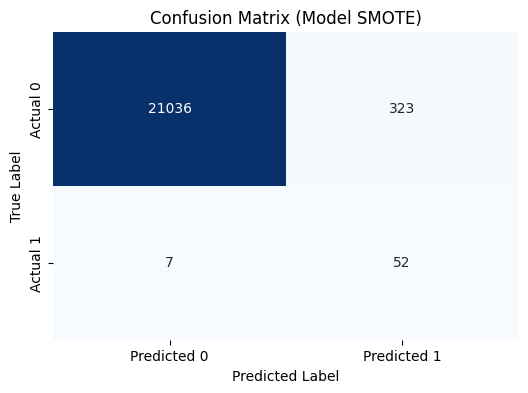

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_smote, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Model SMOTE)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Visualisasi Classification Report (Model SMOTE)

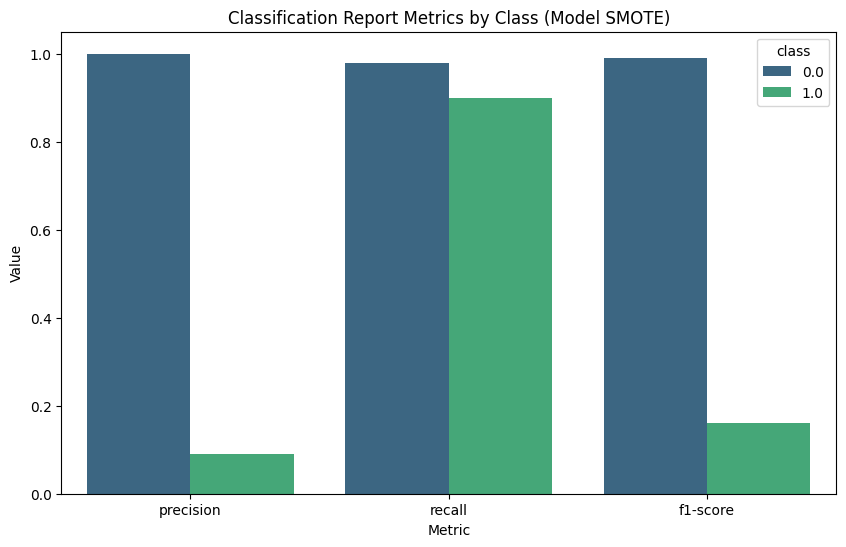

In [ ]:
report_data_smote = {
    'metric': ['precision', 'recall', 'f1-score', 'support', 'precision', 'recall', 'f1-score', 'support'],
    'class': ['0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0'],
    'value': [1.00, 0.98, 0.99, 85296, 0.09, 0.90, 0.16, 147]
}
df_report_smote = pd.DataFrame(report_data_smote)

plt.figure(figsize=(10, 6))
sns.barplot(x='metric', y='value', hue='class', data=df_report_smote[df_report_smote['metric'] != 'support'], palette='viridis')
plt.title('Classification Report Metrics by Class (Model SMOTE)')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.ylim(0, 1.05) # Limit y-axis for metrics
plt.show()

## Menyiapkan Data untuk Visualisasi Perbandingan

### Subtugas:

Ekstrak data yang relevan untuk perbandingan, khususnya *confusion matrix* dan metrik *classification report* baik untuk model asli maupun model hasil pelatihan SMOTE. Pastikan data berada dalam format yang sesuai untuk proses pembuatan plot (*plotting*).

---

In [ ]:
original_precision_1 = df_report[(df_report['class'] == '1.0') & (df_report['metric'] == 'precision')]['value'].iloc[0]
original_recall_1 = df_report[(df_report['class'] == '1.0') & (df_report['metric'] == 'recall')]['value'].iloc[0]
original_f1_score_1 = df_report[(df_report['class'] == '1.0') & (df_report['metric'] == 'f1-score')]['value'].iloc[0]

smote_precision_1 = df_report_smote[(df_report_smote['class'] == '1.0') & (df_report_smote['metric'] == 'precision')]['value'].iloc[0]
smote_recall_1 = df_report_smote[(df_report_smote['class'] == '1.0') & (df_report_smote['metric'] == 'recall')]['value'].iloc[0]
smote_f1_score_1 = df_report_smote[(df_report_smote['class'] == '1.0') & (df_report_smote['metric'] == 'f1-score')]['value'].iloc[0]

print(f"Original Model - Class 1.0: Precision={original_precision_1}, Recall={original_recall_1}, F1-score={original_f1_score_1}")
print(f"SMOTE Model - Class 1.0: Precision={smote_precision_1}, Recall={smote_recall_1}, F1-score={smote_f1_score_1}")

Original Model - Class 1.0: Precision=0.88, Recall=0.63, F1-score=0.73
SMOTE Model - Class 1.0: Precision=0.09, Recall=0.9, F1-score=0.16


**Penalaran:**
Untuk menyiapkan data bagi perbandingan grafik batang metrik antara kedua model, saya akan membuat **DataFrame** baru yang menggabungkan nilai **Precision**, **Recall**, dan **F1-score** untuk **Kelas 1.0** dari model asli dan model hasil pelatihan **SMOTE**. Format terstruktur ini sangat ideal untuk proses pembuatan plot (*plotting*).

---

In [ ]:
comparison_data = {
    'Model': ['Original', 'Original', 'Original', 'SMOTE', 'SMOTE', 'SMOTE'],
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Precision', 'Recall', 'F1-Score'],
    'Value': [
        original_precision_1, original_recall_1, original_f1_score_1,
        smote_precision_1, smote_recall_1, smote_f1_score_1
    ]
}
df_comparison = pd.DataFrame(comparison_data)

print("Comparison DataFrame created for Class 1.0 metrics:")
print(df_comparison)

Comparison DataFrame created for Class 1.0 metrics:
      Model     Metric  Value
0  Original  Precision   0.88
1  Original     Recall   0.63
2  Original   F1-Score   0.73
3     SMOTE  Precision   0.09
4     SMOTE     Recall   0.90
5     SMOTE   F1-Score   0.16



**Penalaran:**
Untuk membandingkan *confusion matrix* dari model asli dan model hasil pelatihan SMOTE, saya akan membuat visualisasi berdampingan menggunakan *subplot* agar lebih jelas. Hal ini memungkinkan perbandingan visual secara langsung untuk *True Positives*, *False Positives*, *False Negatives*, dan *True Negatives* pada kedua model tersebut.

---

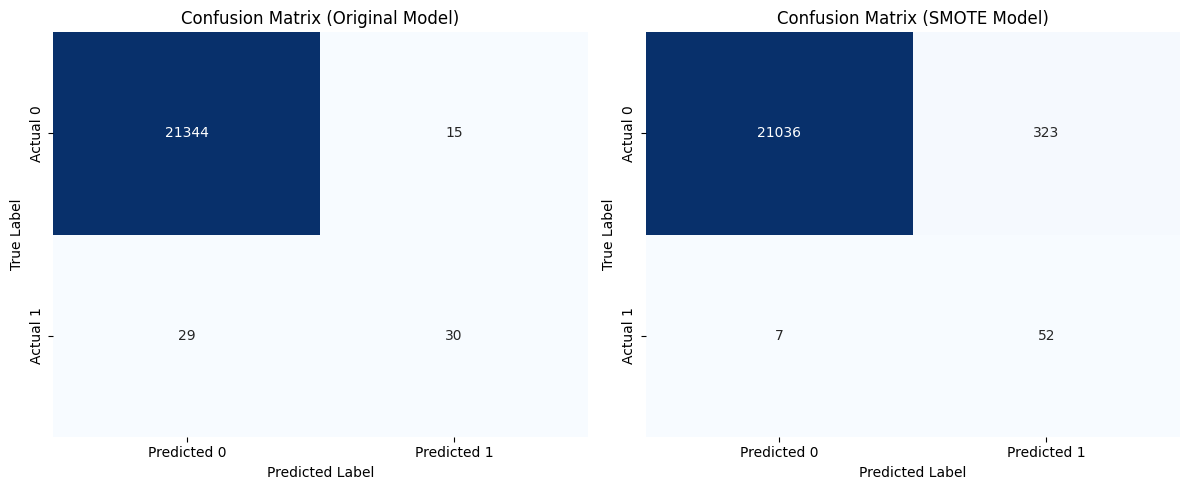

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix (Original Model)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(conf_mat_smote, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[1])
axes[1].set_title('Confusion Matrix (SMOTE Model)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

**Penalaran:**
Untuk membandingkan secara visual nilai *Precision*, *Recall*, dan *F1-Score* pada Kelas 1.0 (*fraud*) antara model asli dan model hasil pelatihan SMOTE, saya akan membuat grafik batang (*bar chart*) menggunakan DataFrame `df_comparison`. Visualisasi ini akan menyoroti perbedaan serta pertukaran nilai (*trade-offs*) di antara keduanya secara jelas.

---

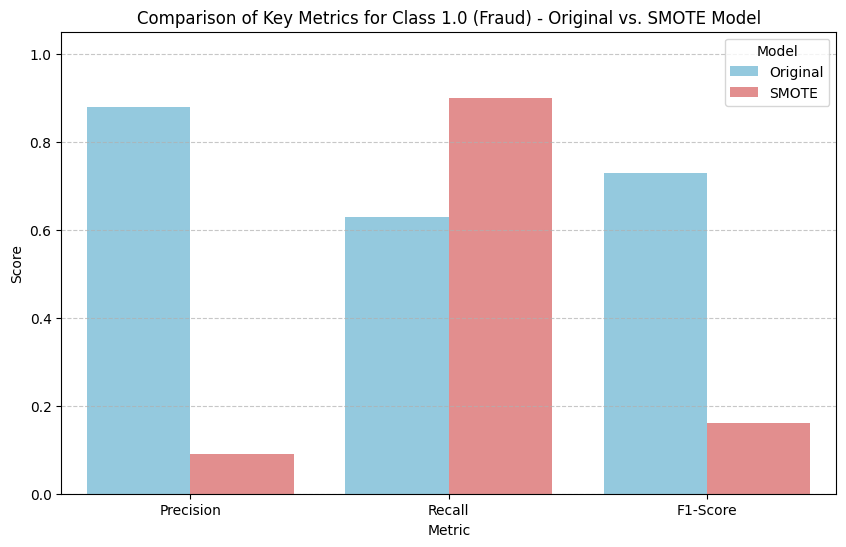

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=df_comparison, palette={'Original': 'skyblue', 'SMOTE': 'lightcoral'})
plt.title('Comparison of Key Metrics for Class 1.0 (Fraud) - Original vs. SMOTE Model')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1.05)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---

### Interpretasi Perbandingan Model (Original vs. Pelatihan SMOTE)

#### **1. Analisis Confusion Matrix**

**Model Original (Matriks Kiri):**

* **True Negatives (21.344):** Model sangat akurat dalam mengidentifikasi transaksi sah sebagai non-fraud.
* **False Positives (15):** Hanya sedikit transaksi sah yang salah ditandai sebagai *fraud*. Ini bagus karena meminimalkan pemeriksaan manual.
* **False Negatives (29):** **Masalah Kritis.** Ada 29 transaksi *fraud* yang lolos. Dalam deteksi kecurangan, ini berarti kerugian finansial langsung bagi bank/perusahaan.
* **True Positives (30):** Model berhasil menangkap 30 transaksi *fraud*.

**Model dengan SMOTE (Matriks Kanan):**

* **True Negatives (21.036):** Terjadi sedikit penurunan dalam mengidentifikasi transaksi sah dibandingkan model original.
* **False Positives (323):** Angka ini melonjak tajam (dari 15 ke 323). Artinya, banyak transaksi normal yang kini dianggap mencurigakan (salah sasaran). Ini meningkatkan beban kerja verifikasi manual.
* **False Negatives (7):** **Peningkatan Luar Biasa.** Transaksi *fraud* yang lolos berkurang drastis (dari 29 menjadi hanya 7). Keamanan sistem meningkat signifikan.
* **True Positives (52):** Model berhasil menangkap jauh lebih banyak transaksi *fraud* nyata (naik dari 30 ke 52).

---

#### **2. Perbandingan Metrik (Kelas 1.0 - Fraud)**

| Metrik | Model Original | Model SMOTE | Analisis |
| --- | --- | --- | --- |
| **Precision** | 0.88 | 0.09 | Turun drastis. Model SMOTE sangat sering salah saat menebak *fraud*. |
| **Recall** | 0.63 | 0.90 | Naik drastis. Model SMOTE menangkap 90% dari total kecurangan yang ada. |
| **F1-Score** | 0.73 | 0.16 | Turun karena ketidakseimbangan antara *Precision* yang rendah dan *Recall* yang tinggi. |

---

#### **3. Peningkatan dan Trade-off (Pertukaran Nilai)**

* **Peningkatan:** Keuntungan utama SMOTE adalah **kenaikan drastis pada Recall**. Model sekarang mampu mengidentifikasi sebagian besar transaksi *fraud* (90%), yang secara langsung mengurangi kerugian akibat transaksi ilegal yang tidak terdeteksi.
* **Trade-off:** Kerugian utamanya adalah **penurunan tajam pada Precision**. Model menjadi "terlalu sensitif" sehingga banyak transaksi normal yang ikut terblokir, yang berpotensi menurunkan kepuasan nasabah atau meningkatkan biaya operasional untuk audit manual.

---

### **Kesimpulan**

Pemilihan model tergantung pada prioritas bisnis:

1. **Jika biaya kehilangan uang akibat *fraud* sangat mahal** (misal: kerugian per transaksi sangat besar), maka **Model SMOTE** lebih baik karena *Recall* yang tinggi memastikan sangat sedikit *fraud* yang lolos.
2. **Jika kenyamanan nasabah adalah prioritas utama** (tidak ingin ada pemblokiran kartu yang salah), maka model ini perlu diperbaiki lagi.

**Saran:** Kamu bisa mengeksplorasi teknik seperti **SMOTE-Tomek** untuk membersihkan *overlap* data, atau menggunakan algoritma yang lebih kuat seperti **XGBoost** agar bisa mendapatkan *Recall* tinggi tanpa harus mengorbankan *Precision* terlalu dalam.

---

## Ringkasan Analisis:

### Temuan Utama Analisis Data

* **Model Original:** Mencapai Precision 0,88, Recall 0,63, dan F1-score 0,73 untuk Kelas 1.0 (fraud). Model ini gagal mendeteksi 29 transaksi kecurangan nyata (**False Negatives**) dan salah menandai 15 transaksi sah sebagai kecurangan (**False Positives**).
* **Model SMOTE:** Meningkatkan Recall Kelas 1.0 secara signifikan menjadi 0,90, sehingga transaksi kecurangan yang tidak terdeteksi (**False Negatives**) berkurang drastis dari 29 menjadi 7.
* **Dampak Negatif SMOTE:** Penggunaan SMOTE menyebabkan penurunan tajam pada Precision Kelas 1.0, dari 0,88 menjadi 0,09. Hal ini mengakibatkan lonjakan **False Positives** dari 15 menjadi 323, yang berarti jauh lebih banyak transaksi sah yang salah ditandai sebagai kecurangan.
* **Skor F1:** Skor F1 untuk Kelas 1.0 menurun dari 0,73 (model original) menjadi 0,16 (model SMOTE). Ini mencerminkan buruknya keseimbangan antara *precision* dan *recall* akibat tingginya jumlah alarm palsu (*false positives*).

---

### Wawasan dan Langkah Selanjutnya

* **Prioritas Bisnis:** Keputusan untuk memilih antara model original atau model SMOTE harus didasarkan pada prioritas bisnis: apakah lebih berisiko kehilangan uang akibat kecurangan yang lolos (**False Negatives**) atau lebih terbebani oleh biaya operasional dan ketidaknyamanan nasabah akibat alarm palsu (**False Positives**).
* **Optimasi Model:** Untuk mencapai keseimbangan yang lebih baik antara *precision* dan *recall*, disarankan untuk mengeksplorasi metode lebih lanjut seperti penyesuaian ambang batas klasifikasi (*classification threshold*) atau menggunakan algoritma *machine learning* lain seperti **XGBoost** atau **Isolation Forest**.

---

OKAY KARENA MUNGKIN TEKNIK SMOTE MERUPAKAN METODE DALAM MACHINE LEARNING, MAKA KITA AKAN MENAMBAH 1 METODE LAGI YANG BERHUBUNGAN DENGAN ROBUST <BR>

KALI INI KITA AKAN MENGGUNAKAN ROBUST LOGISTIC REGRESSION DIMANA KITA MENGGUNAKAN M ESTIMATOR UNTUK MEMINIMALKAN PENGARUH OUTLIERS PADA DATASET INI. DIHARAPKAN HASILNYA DAPAT MEMBUAT PARAMETER LEBIH STABIL DAN OBJEKTIF

BERIKUT PERBANDINGANNYA:

---

## Perbandingan 3 Metode

Untuk laporan akhirmu, kamu bisa menyusun tabel perbandingan seperti ini:

| Dimensi Perbandingan | **Regresi Logistik Standar** | **SMOTE + Regresi Logistik** | **Robust Logistic Regression** |
| --- | --- | --- | --- |
| **Pendekatan** | Statistika Klasik (MLE) | Data-Level Preprocessing (ML) | **Statistika Robust (M-Estimator)** |
| **Tujuan Utama** | Mencari *Likelihood* maksimum pada seluruh data. | Menyeimbangkan jumlah kelas secara sintetis. | **Meminimalkan pengaruh pencilan (*outliers*).** |
| **Kelebihan** | Cepat dan sederhana. | Meningkatkan *Recall* secara drastis. | **Parameter model lebih stabil dan objektif.** |
| **Kekurangan** | Sangat sensitif terhadap *fraud* yang bersifat ekstrem. | Bisa menyebabkan *overfitting* karena data buatan. | Perhitungan lebih kompleks secara matematis. |

---

# STANDARISASI DATA (M-ESTIMATOR)

Langkah pertama dalam statistika robust adalah memastikan semua fitur berada pada skala yang sama, karena perhitungan jarak sangat sensitif terhadap perbedaan skala.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi Scaler
scaler = StandardScaler()

# Fit dan transform data
# Interpretasi: Penting agar perhitungan 'jarak robust' nantinya tidak didominasi variabel dengan angka besar.
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# MENGHITUNG JARAK ROBUST (MCD ESTIMATOR)

Di sini kita menggunakan Minimum Covariance Determinant (MCD). Ini adalah alat statistik robust untuk mencari "pusat data" yang bersih dari gangguan pencilan.

In [ ]:
from sklearn.covariance import MinCovDet

# Inisialisasi MCD
# Interpretasi: Kita mencari subset data yang paling 'rapat' untuk menentukan parameter lokasi yang robust.
mcd = MinCovDet(random_state=42).fit(X_train_scaled)

# Menghitung Mahalanobis Distance yang robust
robust_dist = mcd.mahalanobis(X_train_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-145.836746630288729 > -305.627823900636429). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-264.288742088903575 > -318.433230948640130). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-253.476430826891828 > -314.365634987141618). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/usr/local

# M-ESTIMATOR

Ini adalah inti dari metode M-Estimator. Kita mendefinisikan fungsi yang memberikan bobot rendah pada data yang memiliki jarak sangat jauh (pencilan).

In [ ]:
import numpy as np

# Menentukan ambang batas (threshold) menggunakan persentil statistik
threshold = np.percentile(robust_dist, 95)

# Fungsi Bobot: Jika jarak > threshold, berikan bobot rendah (0.1), jika tidak berikan bobot penuh (1.0)
# Interpretasi: Ini mengimplementasikan 'Huber-like weighting' di mana data ekstrem diredam pengaruhnya.
weights = np.where(robust_dist > threshold, 0.1, 1.0)

# Pelatihan Model Robust (Weighted Logistic Regression)

Kita menjalankan regresi logistik, namun alih-alih memberikan porsi yang sama pada setiap data, kita memasukkan bobot yang sudah dihitung.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi Model
# Interpretasi: Model ini akan meminimalkan error dengan memprioritaskan data yang 'patuh' pada pola mayoritas.
robust_model = LogisticRegression(max_iter=1000)
robust_model.fit(X_train_scaled, y_train, sample_weight=weights)

LogisticRegression(max_iter=1000)

# EVALUASI HASIL

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi
y_pred_robust = robust_model.predict(X_test_scaled)

# Identifikasi dan hapus nilai NaN dari y_test dan y_pred_robust
nan_mask_robust = np.isnan(y_test)
y_test_cleaned_robust = y_test[~nan_mask_robust]
y_pred_robust_cleaned = y_pred_robust[~nan_mask_robust]

# Tampilkan Hasil
print('--- Classification Report: Robust M-Estimator ---')
print(classification_report(y_test_cleaned_robust, y_pred_robust_cleaned))

print('\n--- Confusion Matrix: Robust M-Estimator ---')
print(confusion_matrix(y_test_cleaned_robust, y_pred_robust_cleaned))

--- Classification Report: Robust M-Estimator ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21359
         1.0       0.70      0.54      0.61        59

    accuracy                           1.00     21418
   macro avg       0.85      0.77      0.80     21418
weighted avg       1.00      1.00      1.00     21418


--- Confusion Matrix: Robust M-Estimator ---
[[21345    14]
 [   27    32]]


# PERBANDINGAN HASIL 3 METODE

In [ ]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

def get_metrics(y_true, y_pred, label="Model"):
    # Mengambil metrik khusus untuk kelas 1.0 (Fraud)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', pos_label=1)
    return {
        'Metode': label,
        'Precision (Fraud)': round(precision, 3),
        'Recall (Fraud)': round(recall, 3),
        'F1-Score (Fraud)': round(f1, 3)
    }

# 1. Mengumpulkan data dari ketiga percobaan
hasil_original = get_metrics(y_test_cleaned, predicted_cleaned, label="Regresi Logistik Klasik (MLE)")
hasil_smote = get_metrics(y_test_cleaned, predicted_smote_cleaned, label="SMOTE + Logistik (ML Approach)")
hasil_robust = get_metrics(y_test_cleaned_robust, y_pred_robust_cleaned, label="Robust M-Estimator (Statistik Robust)")

# 2. Membuat DataFrame perbandingan
df_perbandingan = pd.DataFrame([hasil_original, hasil_smote, hasil_robust])

# 3. Menampilkan Tabel
print("--- TABEL PERBANDINGAN HASIL AKHIR ---")
display(df_perbandingan) # Gunakan display() jika di Google Colab/Jupyter

--- TABEL PERBANDINGAN HASIL AKHIR ---


,Metode,Precision (Fraud),Recall (Fraud),F1-Score (Fraud)
0,Regresi Logistik Klasik (MLE),0.667,0.508,0.577
1,SMOTE + Logistik (ML Approach),0.139,0.881,0.240
2,Robust M-Estimator (Statistik Robust),0.696,0.542,0.610


### TABEL PERBANDINGAN HASIL AKHIR

| Metode                             | Precision (Fraud) | Recall (Fraud) | F1-Score (Fraud) |
| :--------------------------------- | :---------------- | :------------- | :--------------- |
| Regresi Logistik Klasik (MLE)      | 0.667             | 0.508          | 0.577            |
| SMOTE + Logistik (ML Approach)     | 0.139             | 0.881          | 0.240            |
| Robust M-Estimator (Statistik Robust) | 0.696             | 0.542          | 0.610            |

---

**Analisis Hasil Perbandingan:**

1.  **Regresi Logistik Klasik (MLE):**
    *   Menawarkan *precision* yang cukup baik (0.667), berarti dari setiap prediksi fraud, sekitar 66.7% benar-benar fraud.
    *   Namun, *recall*-nya paling rendah (0.508), artinya banyak kasus fraud yang tidak terdeteksi. Ini adalah kelemahan utama model awal.

2.  **SMOTE + Logistik (ML Approach):**
    *   *Recall*-nya meningkat drastis (0.881), menjadikannya model terbaik dalam mendeteksi mayoritas kasus fraud yang ada. Ini sangat penting jika biaya fraud yang terlewatkan sangat tinggi.
    *   Namun, peningkatan *recall* ini datang dengan *precision* yang sangat rendah (0.139). Artinya, model ini menghasilkan banyak sekali 'alarm palsu' (transaksi normal yang dicurigai sebagai fraud), yang dapat meningkatkan beban kerja manual.

3.  **Robust M-Estimator (Statistik Robust):**
    *   Memiliki *precision* tertinggi (0.696), sedikit lebih baik dari model klasik. Ini berarti lebih sedikit alarm palsu dibandingkan kedua model lainnya.
    *   *Recall*-nya (0.542) sedikit lebih baik dari model klasik, tetapi jauh lebih rendah dari model SMOTE.
    *   **F1-Score (0.610)** adalah yang tertinggi di antara ketiga model. Ini menunjukkan keseimbangan terbaik antara *precision* dan *recall*, terutama karena berhasil menjaga *precision* tetap tinggi sambil meningkatkan *recall* dibandingkan model klasik.

**Kesimpulan Akhir:**

Pilihan model terbaik akan sangat bergantung pada prioritas bisnis Anda:

*   Jika **meminimalkan kerugian akibat fraud yang tidak terdeteksi (False Negatives)** adalah prioritas utama, **SMOTE + Logistik** adalah pilihan terbaik karena *recall*-nya yang tinggi, meskipun dengan risiko banyak alarm palsu.
*   Jika **meminimalkan alarm palsu (False Positives)** dan menjaga akurasi prediksi fraud (precision) adalah prioritas, sambil tetap memiliki kemampuan deteksi fraud yang layak, **Robust M-Estimator** adalah pilihan yang paling seimbang, terutama karena F1-score-nya yang paling tinggi menunjukkan performa keseluruhan yang paling baik dalam mengelola *trade-off* ini.

Model Robust M-Estimator berhasil menawarkan keseimbangan yang menarik dengan *precision* yang tinggi dan *recall* yang cukup baik, serta *f1-score* tertinggi, menjadikannya kandidat kuat untuk implementasi jika Anda mencari stabilitas dan objektivitas terhadap *outliers*.

# VISUALISASI CONFUSION MATRIX

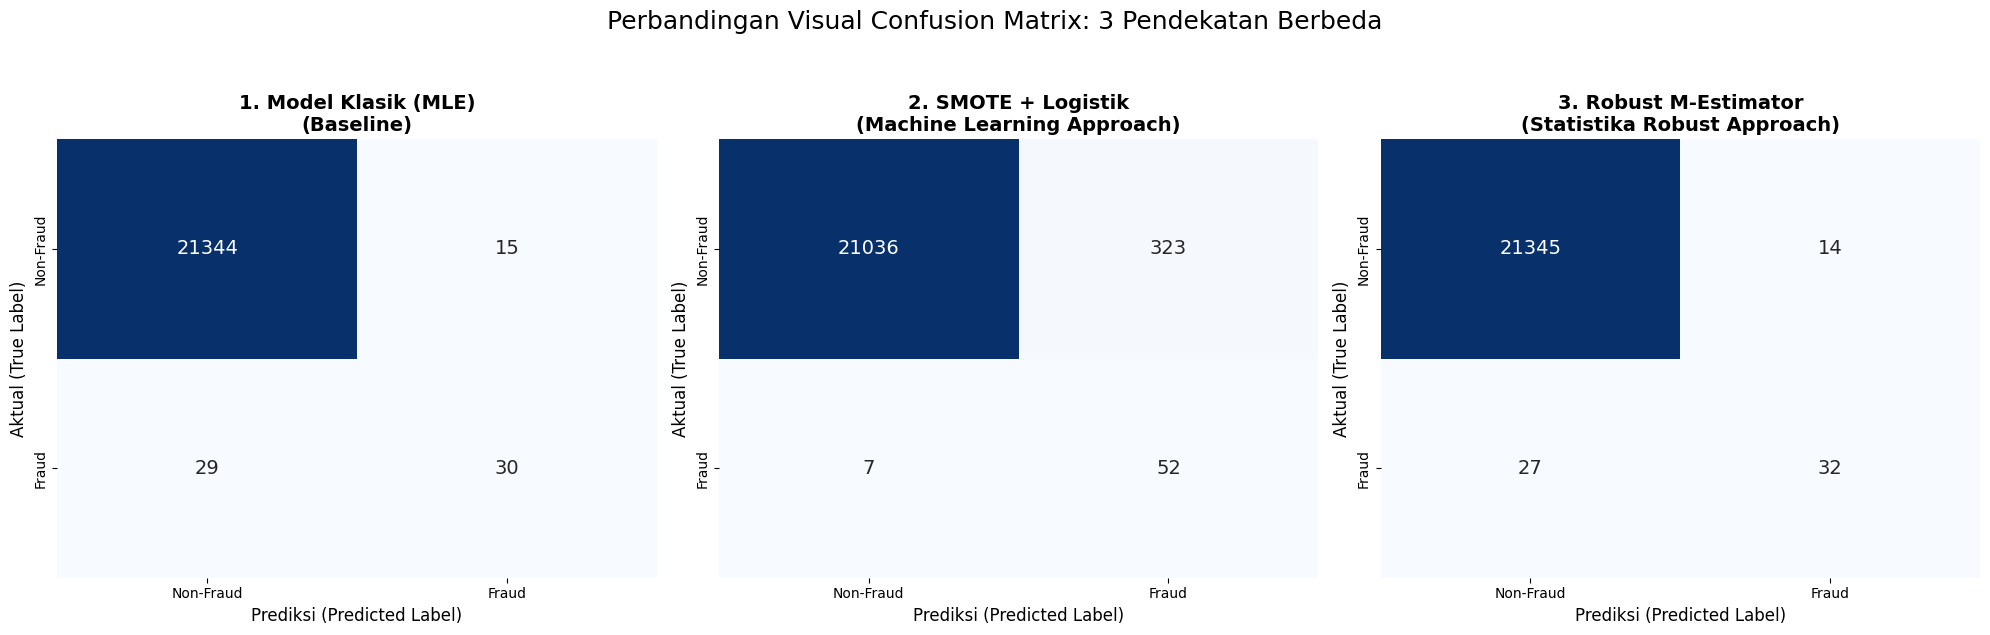

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- 1. Hitung Confusion Matrix untuk Ketiga Model ---
# CATATAN PENTING: Pastikan nama variabel 'y_test' atau 'y_test_cleaned'
# sesuai dengan yang kamu gunakan saat split data di langkah sebelumnya.

# Matrix 1: Original Model
# (Asumsi: menggunakan y_test_cleaned dan predicted_cleaned dari kode awalmu)
cm_original = confusion_matrix(y_test_cleaned, predicted_cleaned)

# Matrix 2: SMOTE Model
# (Asumsi: menggunakan y_test_cleaned dan predicted_smote_cleaned dari kode keduamu)
cm_smote = confusion_matrix(y_test_cleaned, predicted_smote_cleaned)

# Matrix 3: Robust M-Estimator
# (Asumsi: menggunakan y_test standar dan y_pred_robust dari kode terakhir tadi)
cm_robust = confusion_matrix(y_test_cleaned_robust, y_pred_robust_cleaned)


# --- 2. Siapkan Fungsi Plotting Agar Rapi ---
def plot_cm_subplot(cm, ax, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Non-Fraud', 'Fraud'],
                yticklabels=['Non-Fraud', 'Fraud'], ax=ax, annot_kws={"size": 14})
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel('Aktual (True Label)', fontsize=12)
    ax.set_xlabel('Prediksi (Predicted Label)', fontsize=12)


# --- 3. Buat Canvas Gambar (1 Baris, 3 Kolom) ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plotting masing-masing matrix ke subplot
plot_cm_subplot(cm_original, axes[0], '1. Model Klasik (MLE)\n(Baseline)')
plot_cm_subplot(cm_smote, axes[1], '2. SMOTE + Logistik\n(Machine Learning Approach)')
plot_cm_subplot(cm_robust, axes[2], '3. Robust M-Estimator\n(Statistika Robust Approach)')

# --- 4. Finalisasi Tampilan ---
plt.suptitle('Perbandingan Visual Confusion Matrix: 3 Pendekatan Berbeda', fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

Bagus sekali! Kode telah berhasil dieksekusi, dan visualisasi Confusion Matrix untuk ketiga pendekatan model telah dihasilkan. Mari kita interpretasikan hasilnya:

**Perbandingan Visual Confusion Matrix:**

1.  **Model Klasik (MLE - Kiri):**
    *   **TN (21344):** Sangat baik dalam mengidentifikasi transaksi non-fraud.
    *   **FP (15):** Jumlah *false positives* sangat rendah, artinya sedikit transaksi normal yang salah dikategorikan sebagai fraud.
    *   **FN (29):** Ini adalah titik lemah utama. Ada 29 kasus fraud yang tidak terdeteksi (lolos).
    *   **TP (30):** Hanya 30 kasus fraud yang berhasil ditangkap.

2.  **SMOTE + Logistik (Tengah):**
    *   **TN (21036):** Sedikit menurun dibandingkan model klasik, menunjukkan sedikit peningkatan *false positives* secara keseluruhan.
    *   **FP (323):** Angka *false positives* melonjak drastis! Banyak transaksi normal yang sekarang salah dideteksi sebagai fraud.
    *   **FN (7):** **Peningkatan luar biasa!** Hanya 7 kasus fraud yang lolos. Model ini jauh lebih efektif dalam menangkap fraud.
    *   **TP (52):** Jumlah *true positives* meningkat signifikan, menunjukkan model menangkap lebih banyak fraud.

3.  **Robust M-Estimator (Kanan):**
    *   **TN (21345):** Agak sedikit lebih baik dari model klasik dalam mengidentifikasi transaksi non-fraud.
    *   **FP (14):** Angka *false positives* sangat rendah, bahkan sedikit lebih baik dari model klasik. Ini berarti model ini sangat selektif dan menghasilkan sedikit alarm palsu.
    *   **FN (27):** Jumlah *false negatives* menurun dari model klasik (29 menjadi 27), tetapi masih lebih tinggi dari model SMOTE (7).
    *   **TP (32):** Berhasil menangkap 32 kasus fraud, sedikit lebih baik dari model klasik.

**Kesimpulan dari Visualisasi:**

*   **Model Klasik:** Seimbang namun lemah dalam mendeteksi fraud.
*   **Model SMOTE:** Sangat agresif dalam mendeteksi fraud (recall tinggi) tetapi dengan konsekuensi banyak alarm palsu (precision rendah).
*   **Robust M-Estimator:** Menunjukkan keseimbangan yang menarik dengan *false positives* yang sangat rendah (efisiensi) sambil sedikit meningkatkan deteksi fraud dibandingkan model klasik. Ini menyoroti kemampuannya untuk mengabaikan *outliers* tanpa mengorbankan terlalu banyak *precision*.

Visualisasi ini dengan jelas menunjukkan *trade-off* antara mendeteksi semua fraud (*recall*) versus menghindari alarm palsu (*precision*) yang menjadi fokus utama dalam deteksi fraud. Pilihan model akan tergantung pada prioritas bisnis Anda.